In [0]:
import os
import cv2
import io
import pickle
import requests
import zipfile
import numpy as np
from scipy import ndimage
from skimage.transform import resize
from imageio import imread, imsave
from skimage import img_as_float, color, exposure
from skimage.feature import peak_local_max, hog
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
r1 = requests.get('https://github.com/mf00589/COM2028/raw/master/handwritdata.zip')
z1 = zipfile.ZipFile(io.BytesIO(r1.content))
z1.extractall()

In [0]:
DATADIR = './handwrit/'
CATEGORIES = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

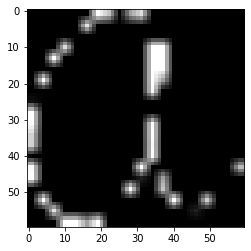

In [0]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    new_array = cv2.resize(img_array, (60,60))
    plt.imshow(new_array)
    plt.show()
    break
  break

In [0]:
training_data2 = []

def create_training_data2():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (60,60))
      training_data2.append([new_array, class_num])

create_training_data2()

In [0]:
print(len(training_data2))

318


In [0]:
import random 

random.shuffle(training_data2)

In [0]:
X1 = []
y1 = []

In [0]:
for features, label in training_data2:
  X1.append(features)
  y1.append(label)




In [0]:
#X1.shape
X1 = np.array(X1).reshape(-1, 60 , 60, 1)
print(len(X1))
print(len(y1))
#y1[32]
y1 = np.array(y1)
#y1[67]

318
318


In [0]:
from sklearn.model_selection import  train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1)

In [0]:
print(len(X_train))
print(len(X_test))

238
80


238


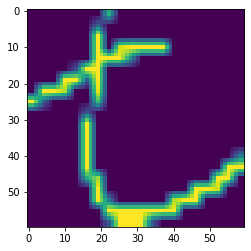

19

In [0]:
print(len(X_train))
plt.imshow(tf.squeeze(X_train[3]))
plt.show()
y_train[3]

In [0]:
X_train[3]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [0]:
import tensorflow as tf
from tensorflow import keras
X1 = X1 / 255.0
X1.shape

y1=np.array(y1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(60, 60)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(40)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
8/8 [==============================] - 0s 34ms/step - loss: 2.8883 - accuracy: 0.3403 - val_loss: 2.0573 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 16ms/step - loss: 1.2207 - accuracy: 0.7437 - val_loss: 1.2745 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 0s 17ms/step - loss: 0.5186 - accuracy: 0.9286 - val_loss: 1.1576 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 0.2212 - accuracy: 0.9832 - val_loss: 0.9750 - val_accuracy: 0.7875
Epoch 5/10
8/8 [==============================] - 0s 16ms/step - loss: 0.1008 - accuracy: 0.9958 - val_loss: 0.9220 - val_accuracy: 0.8250
Epoch 6/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 0.9210 - val_accuracy: 0.8125
Epoch 7/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.9461 - val_accuracy: 0.8125
Epoch 8/10
8/8 [===========

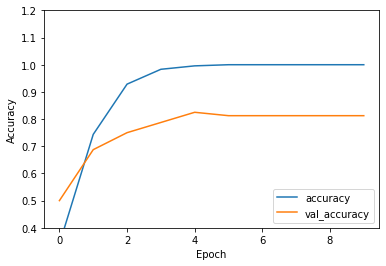

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1.2])
plt.legend(loc='lower right')